In [2]:
import pytest
import pandas as pd
from pathlib import Path
import json
from wikiscraper import Page
from wikiscraper import config
from wikiscraper.scraper import Scraper
from bs4 import BeautifulSoup
from urllib.parse import unquote
import os

HERE = os.getcwd()

In [3]:
path = config.TESTS_DATA_DIR/"team_rocket.html"
text = path.read_text(encoding="utf-8")
soup = BeautifulSoup(text, "lxml")

In [4]:
page = Page(html=text, phrase="team_rocekt")
s = page.summary()
print(s)

Team Rocket (Japanese: ロケット 団 Rocket-dan , literally Rocket Gang ) is a villainous team in pursuit of evil and the exploitation of Pokémon . The
organization is based in the Kanto and Johto regions , with a small outpost in the Sevii Islands .
None


In [5]:
methods = [m for m in dir(Page)
           if callable(getattr(Page, m)) and not m.startswith("__")]
print(methods)

['count_words', 'get_content', 'links', 'summary', 'table']


In [6]:
print(page.links())

['Proton', 'Ariana (Masters)#Arbok', 'Team Rocket HQ (anime)', 'Team Rocket motto', 'Tower duo (Adventures)', 'Pokémon in Chinese', 'Will', "Rocket's Moltres (Gym Heroes 12)", 'Alolan form', 'Pokémon Trading Card Game 2: The Invasion of Team GR!', 'James (Masters)#Weezing', 'Pokémon Web (TCG)', 'Kimono Girl', 'Sleep! (Team Rocket 79)', 'Pokémon Black and White Versions', 'James (Masters)', "Team Rocket's Handiwork (Fates Collide 112)", "Rocket's Entei (VS 95)", 'Giratina (Pokémon)', 'Rust Syndicate', 'Phobos Battalion', 'SM004', 'Dreamyard', 'Marowak (Pokémon)', 'Johto', "The Rocket's Training Gym (Gym Heroes 104)", 'DP191', 'Pokémon animation', 'Meowth M (Movie Random Pack 17)', 'Kaede', "Rocket's Meowth (EX Team Rocket Returns 46)", 'Butch', 'Pokémon Card Game Classic (TCG)', 'Cliff Cave', 'PO02', 'JN024', 'Mt. Moon', 'Gideon', 'Fire Energy (TCG)', 'PG04', 'Digger (Team Rocket 75)', 'Jynx (Pokémon)', 'Musharna (Pokémon)', 'Surprise! Time Machine (EX Team Rocket Returns 91)', 'EX Deox

In [7]:
page.count_words()

In [8]:
import wordfreq

languages = wordfreq.available_languages(wordlist='best')
print(type(languages))

for lang, dir in languages.items():
    print(lang)
    print(wordfreq.top_n_list(lang, 10))

<class 'dict'>
it
['di', 'e', 'che', 'il', 'la', 'a', 'in', 'non', 'un', 'per']
hu
['a', 'az', 'és', 'nem', 'hogy', 'egy', 'is', 'de', 'meg', 'csak']
pl
['w', 'i', 'nie', 'na', 'się', 'to', 'z', 'do', 'jest', 'że']
vi
['là', 'và', 'có', 'của', 'được', 'một', 'các', 'không', 'trong', 'cho']
ru
['в', 'и', 'на', 'не', 'с', 'что', 'я', 'по', 'а', 'как']
el
['και', 'το', 'να', 'του', 'η', 'με', 'την', 'τησ', 'για', 'ο']
ur
['کے', 'میں', 'کی', 'ہے', 'اور', 'سے', 'کا', 'کو', 'اس', 'پر']
sv
['är', 'det', 'att', 'och', 'i', 'jag', 'på', 'en', 'inte', 'som']
he
['את', 'של', 'לא', 'על', 'זה', 'הוא', 'אני', 'כל', 'עם', 'מה']
hi
['के', 'है', 'में', 'की', 'से', 'और', 'को', 'का', 'हैं', 'पर']
de
['die', 'der', 'und', 'in', 'das', 'ich', 'ist', 'nicht', 'zu', 'den']
es
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'no', 'un']
id
['yang', 'dan', 'di', 'ini', 'dari', 'untuk', 'dengan', 'itu', 'bisa', 'aku']
pt
['de', 'a', 'o', 'que', 'e', 'do', 'em', 'da', 'é', 'para']
zh
['的', '是', '在', '了', '我', '和

In [9]:
import requests
from bs4 import BeautifulSoup
from langdetect import detect

url = "https://bulbapedia.bulbagarden.net/wiki/Team_Rocket"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Extract main text
text = soup.get_text()

# Detect language
language = detect(text)
print("Detected language code:", language)

Detected language code: en


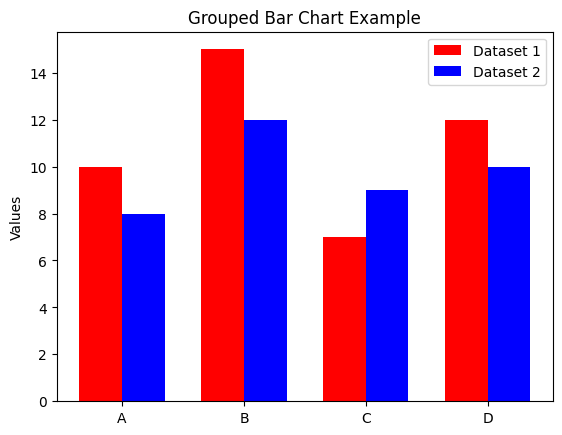

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
categories = ['A', 'B', 'C', 'D']
values1 = [10, 15, 7, 12]  # First set of values (red bars)
values2 = [8, 12, 9, 10]   # Second set of values (blue bars)

# Number of categories
n = len(categories)

# X-axis positions for the groups
x = np.arange(n)  # [0, 1, 2, 3]

# Width of each bar
width = 0.35

# Create bars
plt.bar(x - width/2, values1, width, color='red', label='Dataset 1')
plt.bar(x + width/2, values2, width, color='blue', label='Dataset 2')

# Labels and title
plt.xticks(x, categories)  # set category labels on x-axis
plt.ylabel("Values")
plt.title("Grouped Bar Chart Example")
plt.legend()

plt.show()


In [11]:
import json
from wikiscraper import config
language = 'en'
try:
    raw = config.WORD_COUNTS_JSON.read_text(encoding="utf-8").strip()
    data: dict[str, int] = json.loads(raw) if raw else {}
except json.JSONDecodeError:
    data = {}

words = dict(sorted(data.items())[:20]).keys()
print(words)

sorted_freqs = sorted(data.items(), key=lambda item: item[1], reverse=True)
print(len(sorted_freqs))
words = [k[0] for k in sorted_freqs[:20]]
print(words)

dict_keys(['A', 'Abilities', 'About', 'Abyssal', 'Academy', 'Account', 'Accounts', 'Admins', 'Adventure', 'Adventures', 'Aerodactyl', 'Aether', 'After', 'Again', 'Akagi', 'Alakazam', 'All', 'Alola', 'Alolan', 'Alph'])
1951
['the', 'Rocket', 'Team', 'and', 'to', 'of', 'in', 'Pokémon', 'a', 'is', 'as', 'with', 'that', 'was', 'Giovanni', 'their', 'they', 'The', 'for', 'on']


        Word  Language_Freq  Article_Freq
0         on       0.027823      0.016167
1        for       0.034907      0.016167
2        The       0.183774      0.020505
3       they       0.010814      0.021293
4      their       0.007324      0.021688
5   Giovanni       0.000009      0.021688
6        was       0.022621      0.022871
7       that       0.034907      0.023659
8       with       0.024229      0.023659
9         as       0.020157      0.025237
10        is       0.040040      0.026420
11         a       0.078369      0.040615
12   Pokémon       0.000017      0.062303
13        in       0.063654      0.063486
14        of       0.085898      0.066246
15        to       0.092058      0.082019
16       and       0.087952      0.094243
17      Team       0.001602      0.098186
18    Rocket       0.000070      0.102129
19       the       0.183774      0.151420


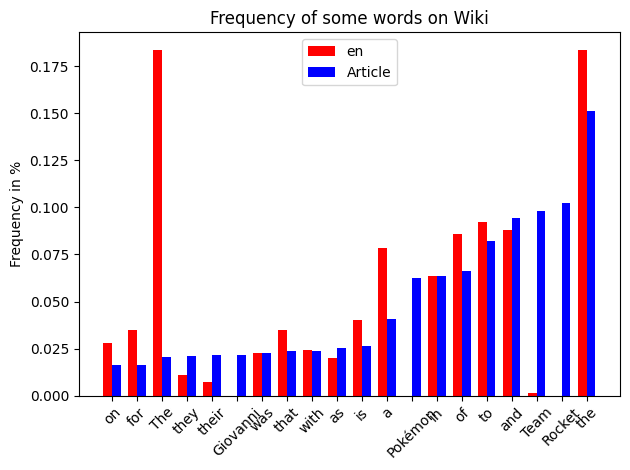

In [1]:
from wikiscraper.controller import Controller
from wikiscraper import config

c = Controller()
c.analyze_relative_word_frequency("article", 20, chart=config.DATA_DIR/"team_rocket.png")

In [ ]:
c.analyze_relative_word_frequency("language", 20, chart=config.DATA_DIR/"team_rocket.png")